In [70]:
#SERVO-PREDICTION

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [86]:
#importing dataset

In [87]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/servo/servo.data"
column_names = ['motor', 'screw', 'pgain', 'vgain', 'class']
data = pd.read_csv(url, header=None, names=column_names)

#converting categorical variables to dummy variables
data = pd.get_dummies(data, columns=['motor', 'screw'])

# Converting 'pgain' and 'vgain' columns to numeric
data['pgain'] = pd.to_numeric(data['pgain'], errors='coerce')
data['vgain'] = pd.to_numeric(data['vgain'], errors='coerce')

In [88]:
#removing NA values

In [89]:
data.dropna(inplace=True)

In [90]:
#describing dataset

In [91]:
data.describe()

,pgain,vgain,class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,1.389708
std,1.017770,1.369850,1.559635
min,3.000000,1.000000,0.131250
25%,3.000000,1.000000,0.503126
50%,4.000000,2.000000,0.731254
75%,5.000000,4.000000,1.259369
max,6.000000,5.000000,7.100108


In [92]:
#Data Visualization

In [93]:
# Plotting the actual response times

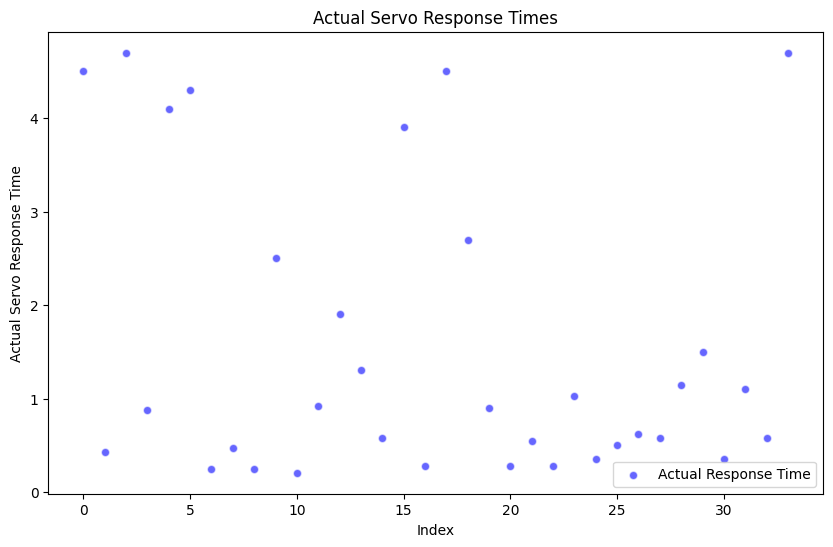

In [82]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, alpha=0.6, edgecolors='w', color='blue', label='Actual Response Time')
plt.xlabel('Index')
plt.ylabel('Actual Servo Response Time')
plt.title('Actual Servo Response Times')
plt.legend()
plt.show()

In [94]:
# plot for actual dataset

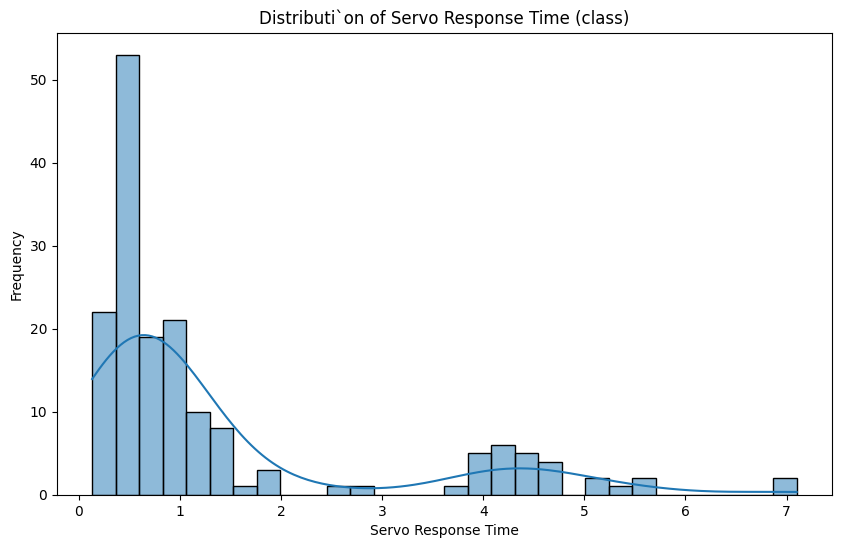

In [95]:
plt.figure(figsize=(10, 6))
sns.histplot(data['class'], kde=True, bins=30)
plt.title('Distributi`on of Servo Response Time (class)')
plt.xlabel('Servo Response Time')
plt.ylabel('Frequency')
plt.show()

In [96]:
# Define Target Variable (y) and Feature Variables (X)

In [97]:
X = data.drop('class', axis=1)
y = data['class']

In [98]:
# Train Test Split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
# Model Evaluation

In [101]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [102]:
# Prediction

In [103]:
y_pred = model.predict(X_test)


In [104]:
#predicted values

In [105]:
y_pred

array([ 2.88914471, -0.44545187,  2.71588442,  2.47166128,  2.69838005,
        3.25068675,  1.02278857,  0.64988739,  0.71495001,  2.14043875,
        1.19604886,  1.67917737,  2.63937358,  1.53066186,  0.18336567,
        2.39054148, -0.82449827,  3.0854841 ,  2.62255243,  1.04854817,
        0.26883949,  1.19413645,  0.88015265,  0.63004991,  0.3983046 ,
        0.83259441,  1.2756886 ,  1.12898475,  1.86086956,  1.35638674,
        1.36125151,  1.84336519,  1.25818423,  2.89015954])

In [106]:
# calculating mse,rmse

In [107]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [68]:
# Plotting actual vs predicted values

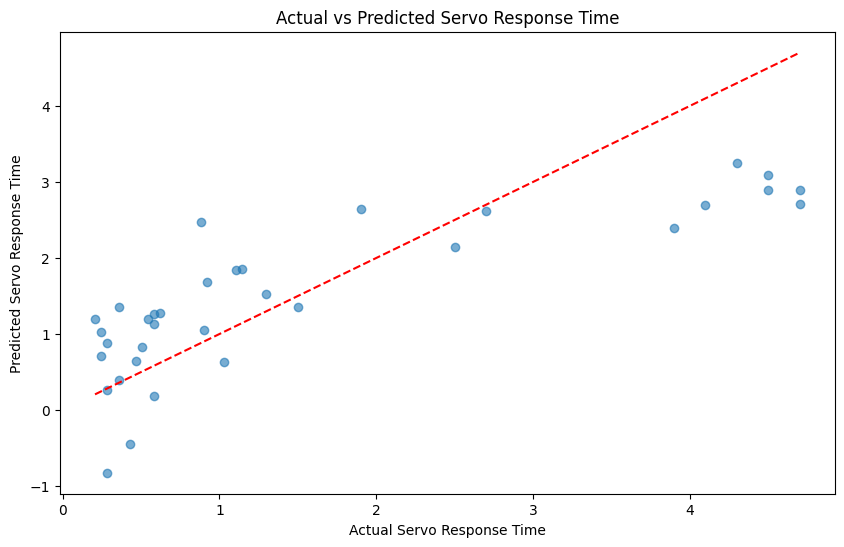

In [108]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Servo Response Time')
plt.ylabel('Predicted Servo Response Time')
plt.title('Actual vs Predicted Servo Response Time')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()


In [109]:
# Plot a heatmap of the correlation matrix

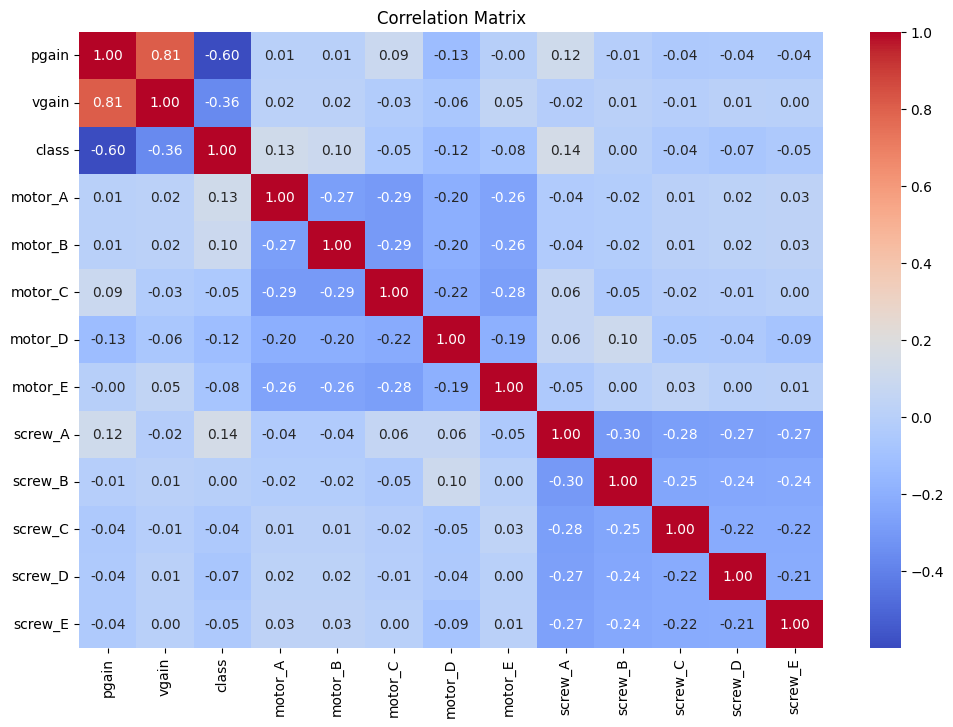

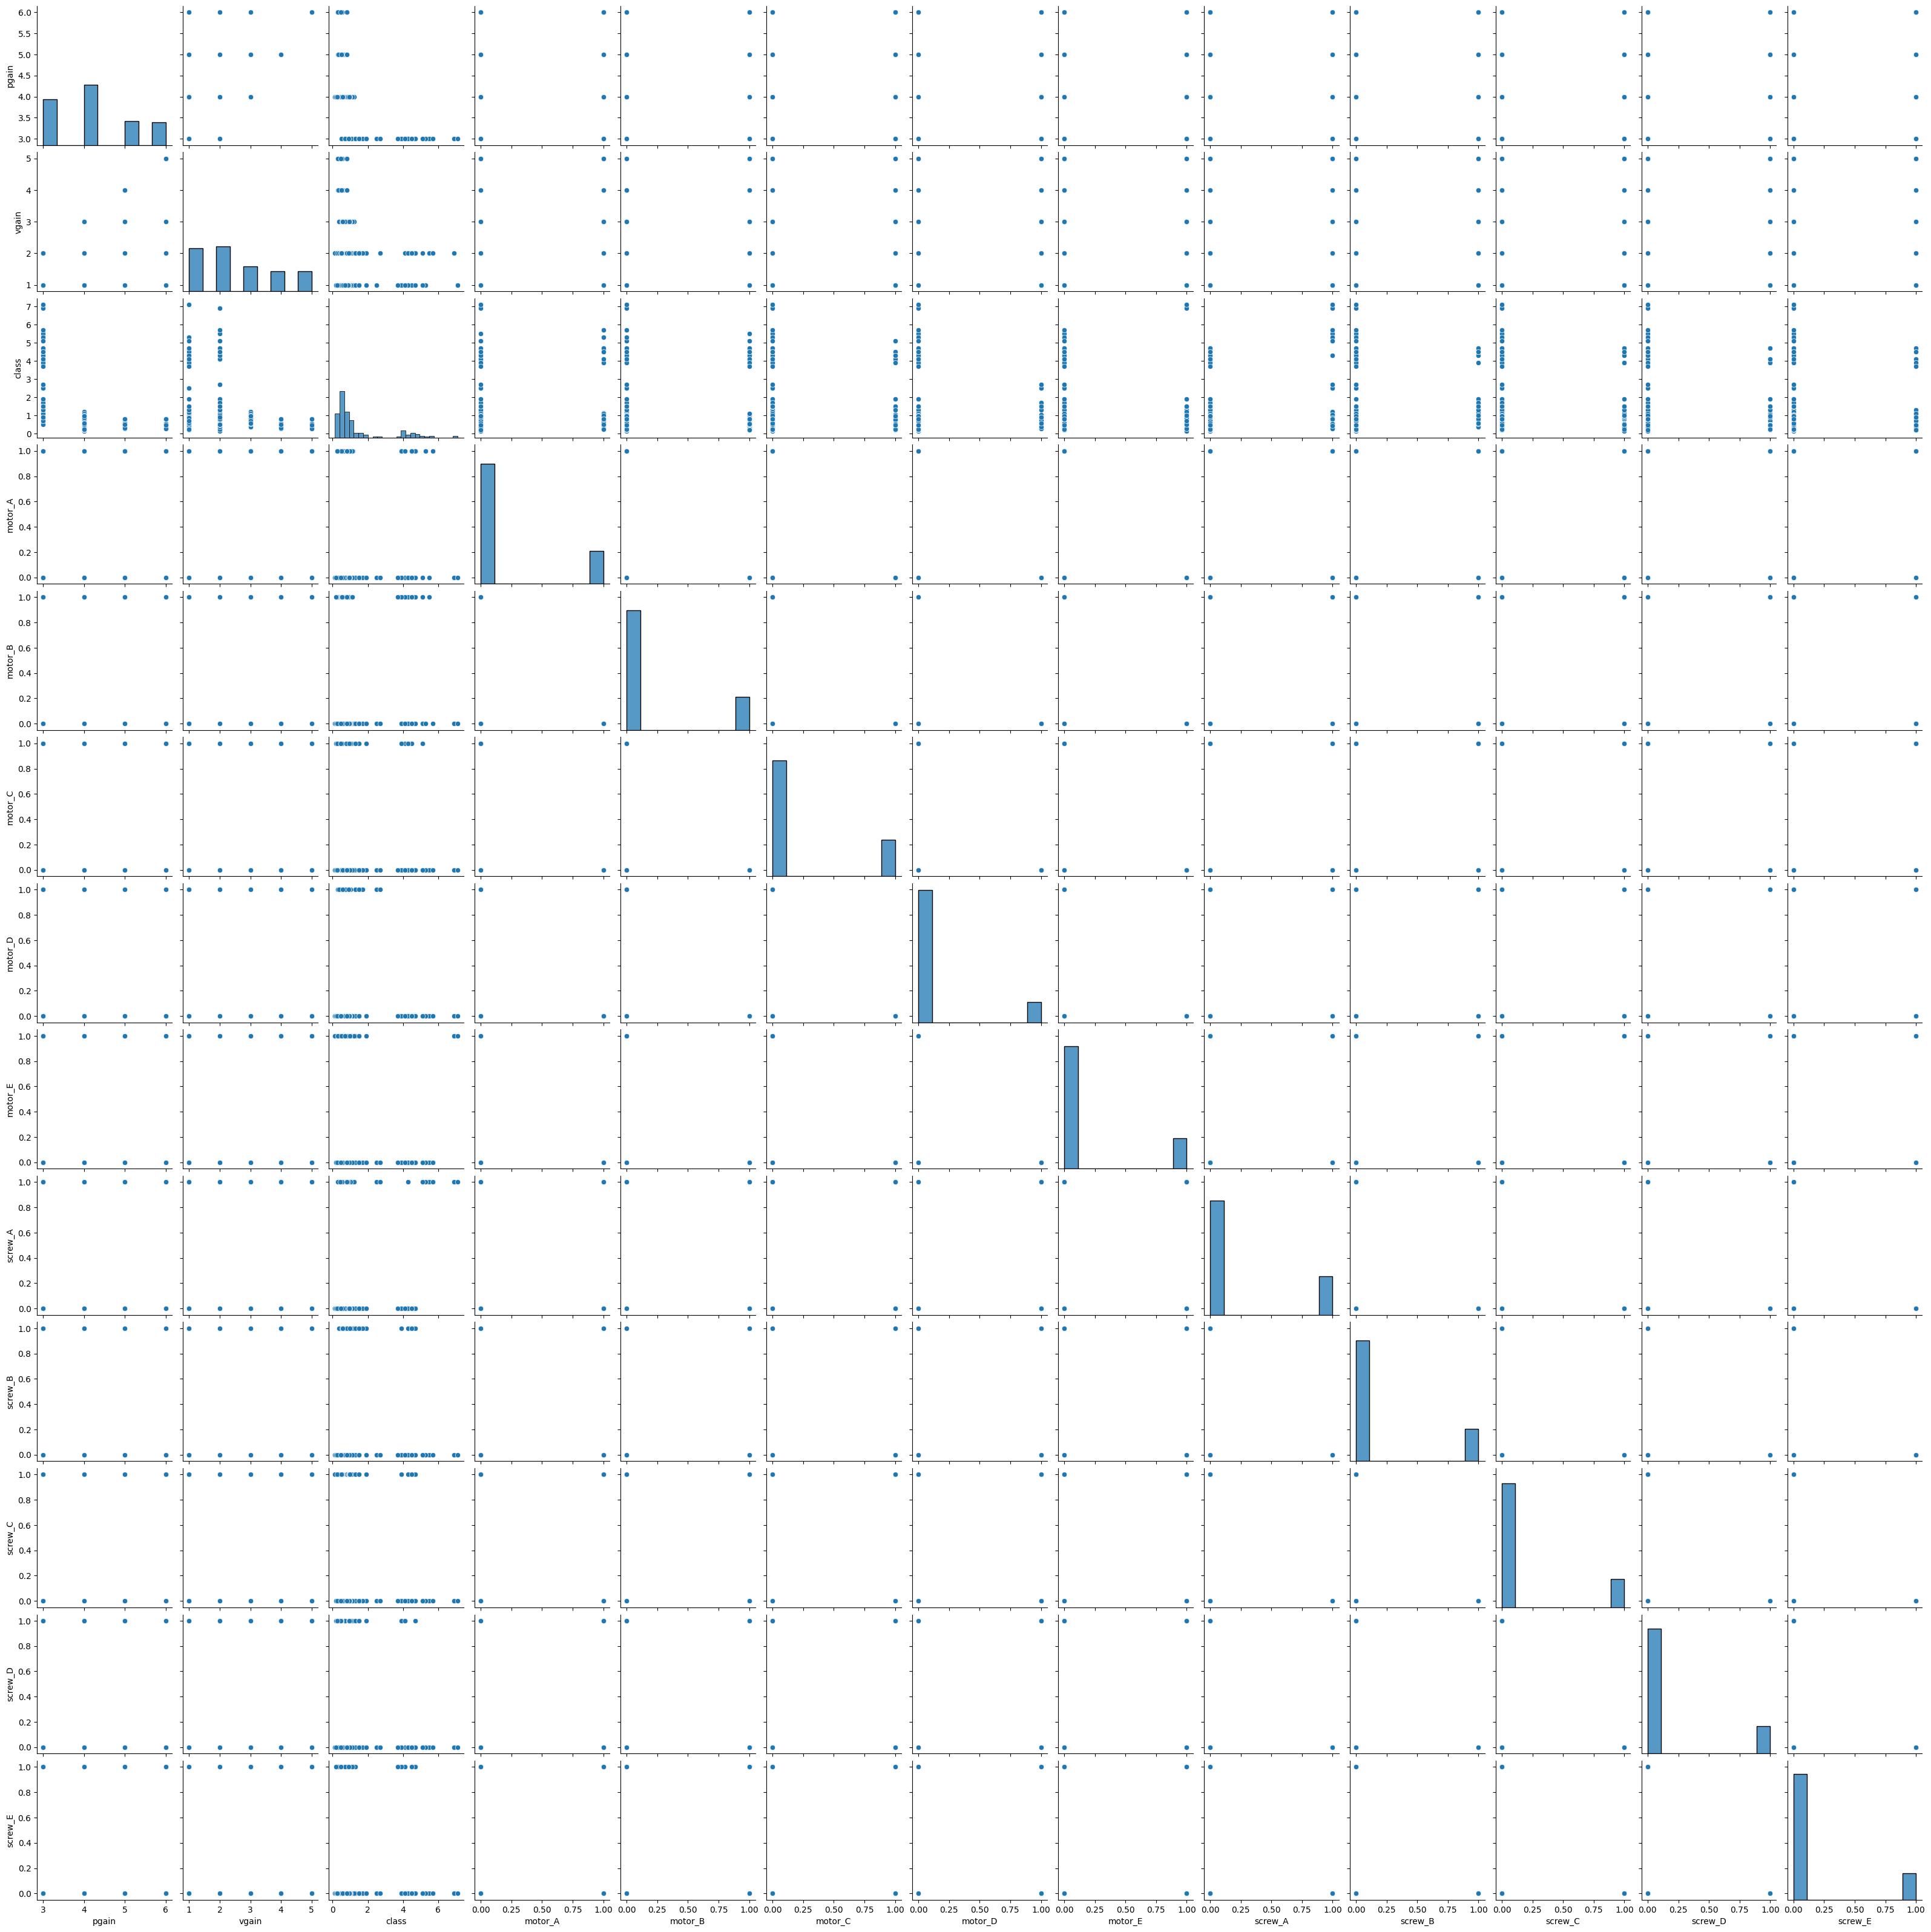

In [110]:
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Plot pairwise relationships
sns.pairplot(data)
plt.show()